# 1. Libraries and Importing Dataset

In [58]:
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 
from pickle import dump

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [59]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [60]:
path = "./Dataset/"

data = pd.read_csv(path+"train_A.csv")  

# original data -> data
dataX = data.iloc[:,4:]
data

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,1,0.532754,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.517402,T050307,A_31,NaN,NaN,20153.0,24984.0,0.21,0.22,...,53.55,52.68,49.97,56.66,63.52,1.0,210.5,214.6,201.6,191.9
2,0,0.522159,T050304,A_31,18031.0,18031.0,NaN,NaN,0.19,0.20,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
3,2,0.541429,T050304,A_31,8164.0,8164.0,NaN,NaN,0.19,0.20,...,56.38,57.10,51.49,56.08,64.40,1.0,NaN,NaN,NaN,NaN
4,1,0.526517,T050307,A_31,NaN,NaN,17014.0,21844.0,0.20,0.22,...,50.45,50.29,57.54,52.59,62.37,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2,0.548592,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,1,0.526997,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,1,0.530940,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,0,0.516681,T050304,A_31,10729.0,10729.0,NaN,NaN,0.20,0.21,...,51.30,47.66,60.00,53.75,62.58,1.0,NaN,NaN,NaN,NaN


<Axes: >

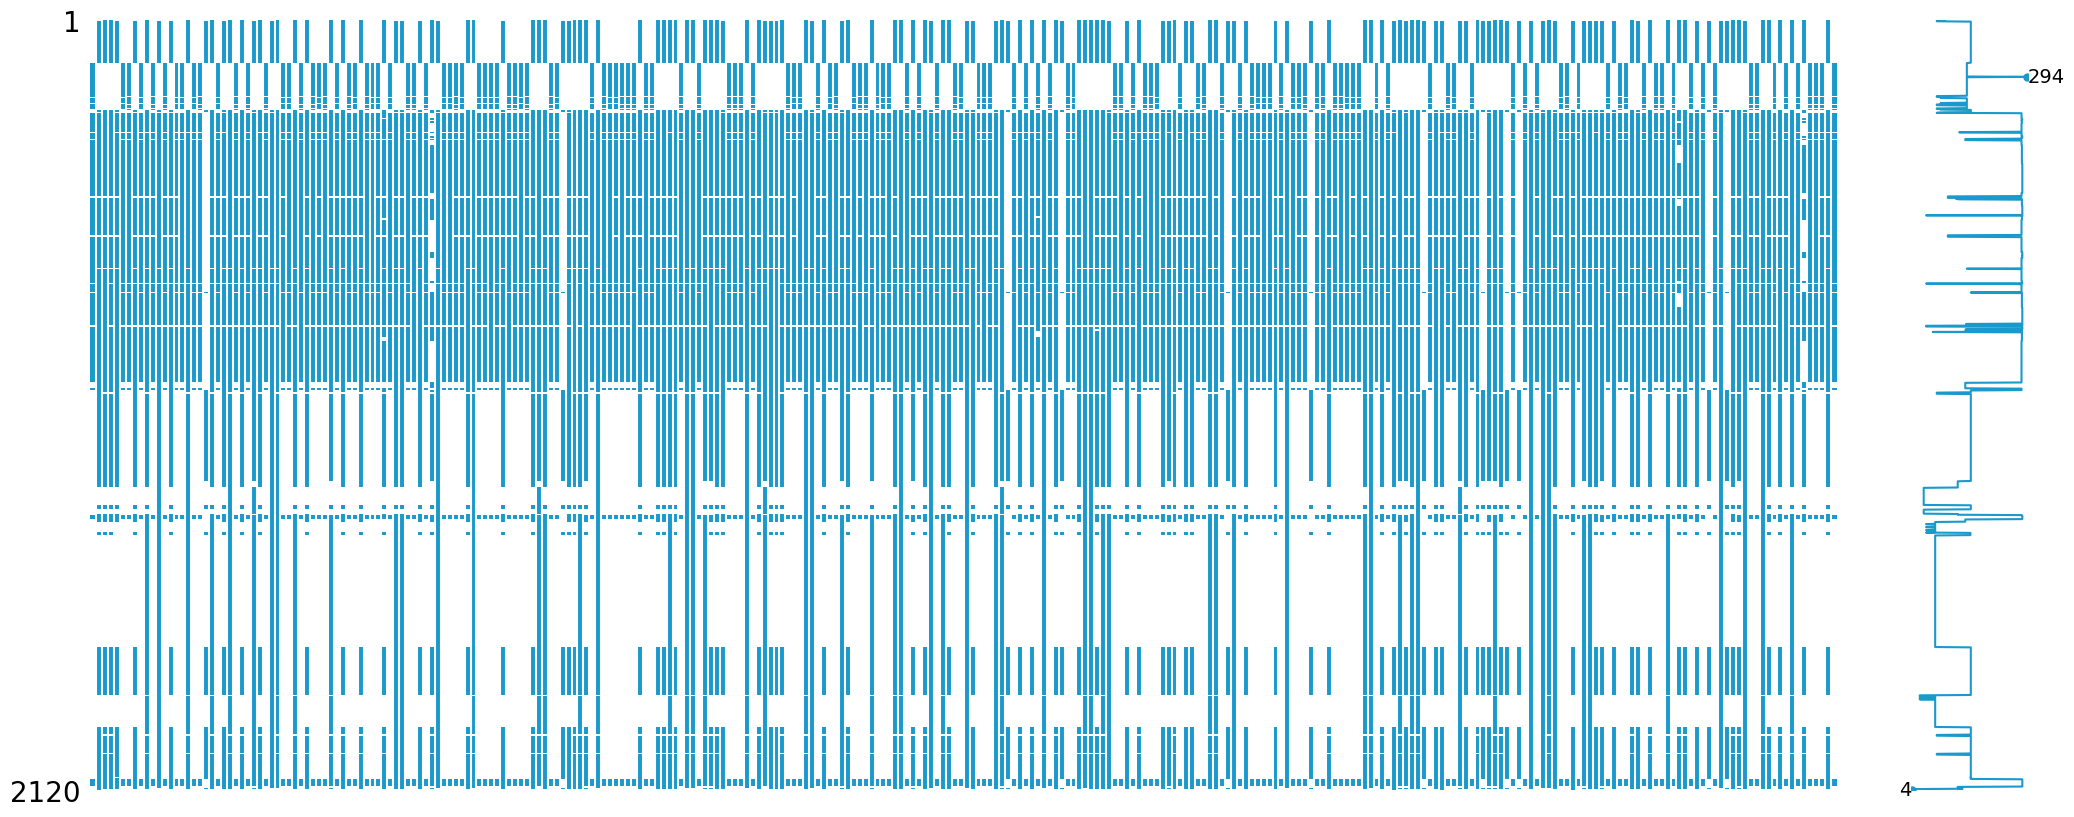

In [155]:
msno.matrix(dataX.T, color=(0.1, 0.6, 0.8))

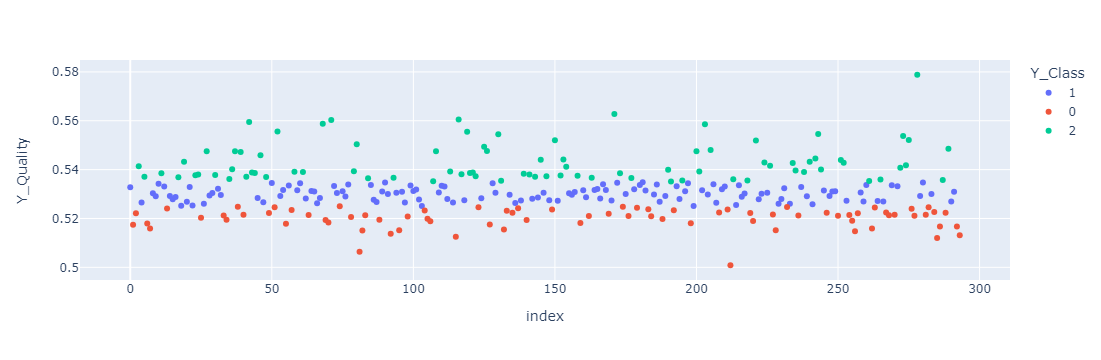

In [28]:
df = data.copy()
df["Y_Class"] = df["Y_Class"].astype(str)
fig = px.scatter(data_frame= df, x=df.index, y=df.Y_Quality, color=df.Y_Class)
fig.show()

# 2. PRODUCT_CODE: A

In [156]:
t50304 = data[data['LINE']=='T050304'].reset_index(drop=True)
t50307 = data[data['LINE']=='T050307'].reset_index(drop=True)
t10306 = data[data['LINE']=='T010306'].reset_index(drop=True)
t10305 = data[data['LINE']=='T010305'].reset_index(drop=True)

tX50304 = t50304.iloc[:,4:]
tX50307 = t50307.iloc[:,4:]
tX10306 = t10306.iloc[:,4:]
tX10305 = t10305.iloc[:,4:]

<Axes: >

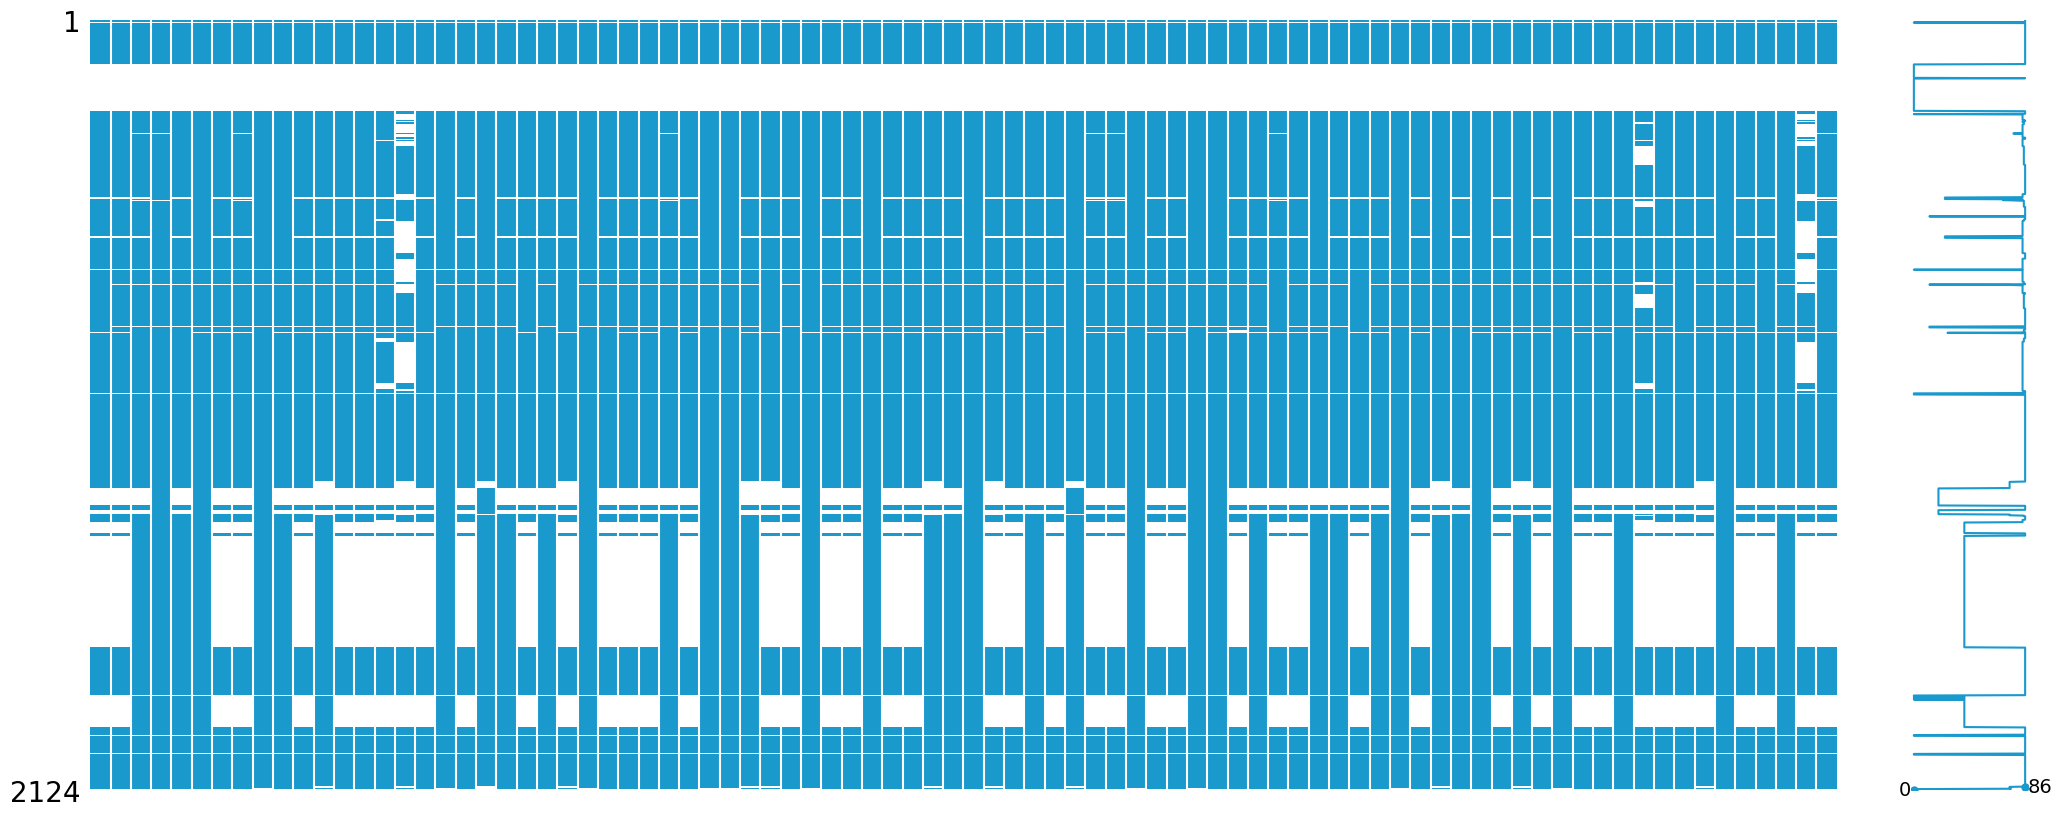

In [157]:
msno.matrix(t50304.T, color=(0.1, 0.6, 0.8))

<Axes: >

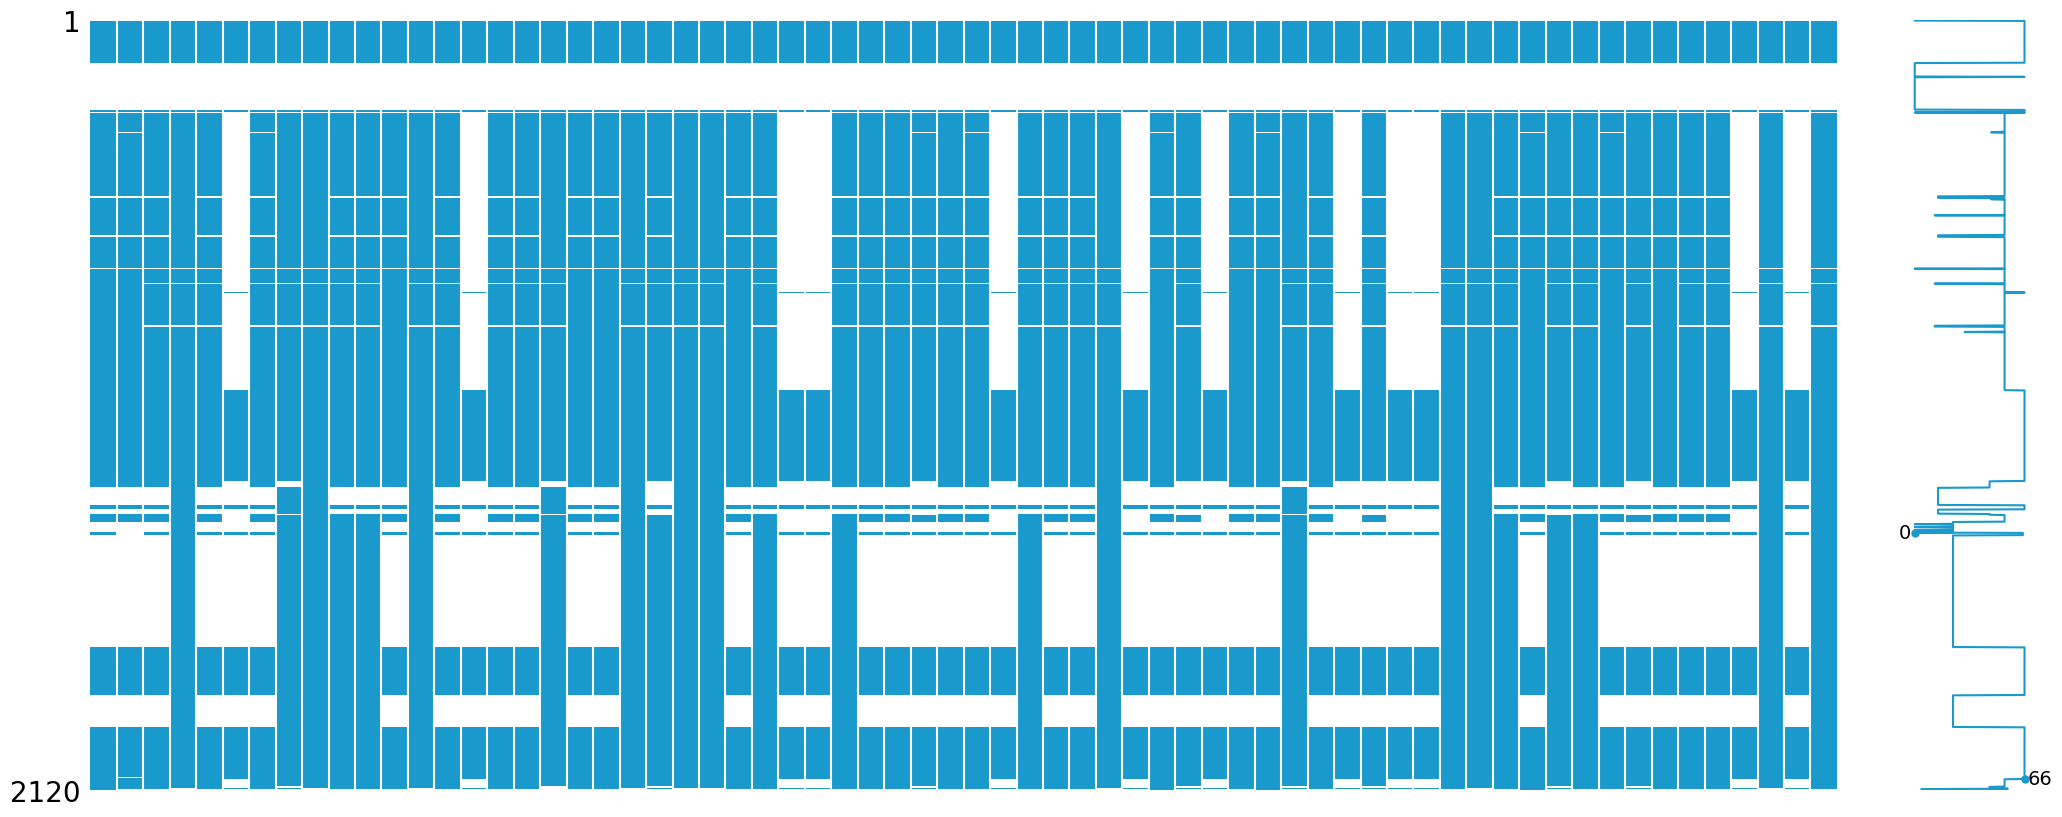

In [158]:
msno.matrix(tX50307.T, color=(0.1, 0.6, 0.8))

<Axes: >

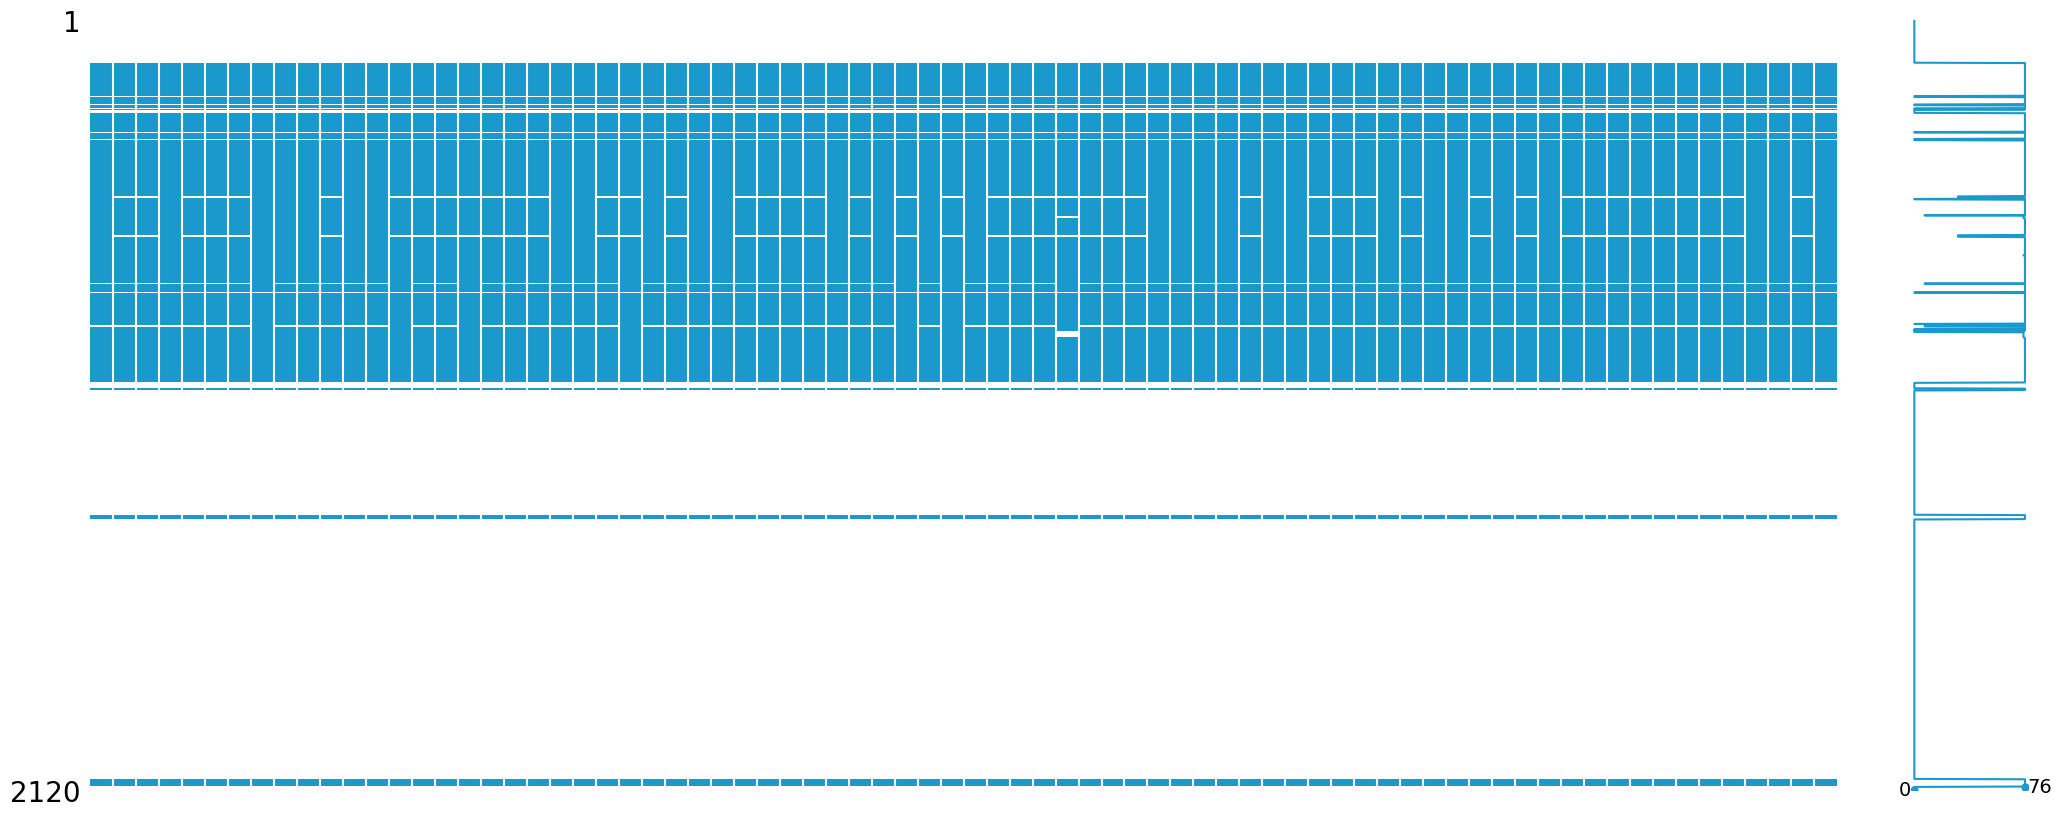

In [159]:
msno.matrix(tX10306.T, color=(0.1, 0.6, 0.8))

<Axes: >

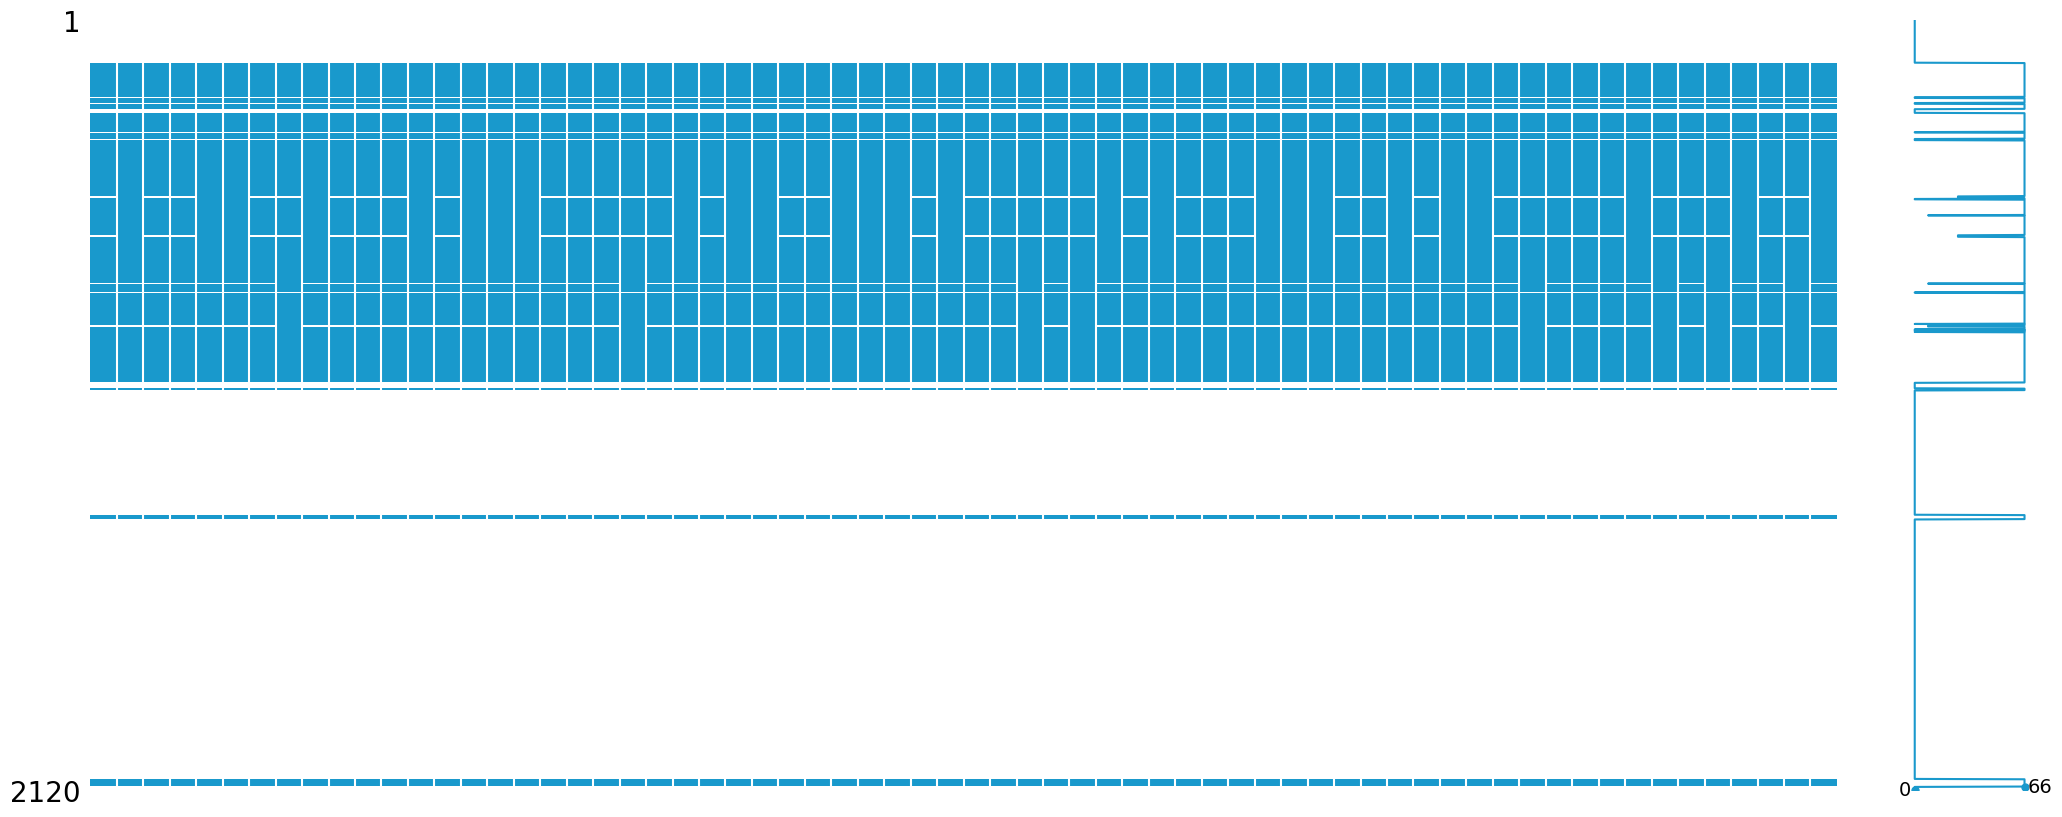

In [160]:
msno.matrix(tX10305.T, color=(0.1, 0.6, 0.8))

### T503: T050304 & T050307

152 X 2,124

1. 같은 값으로만 채워진 column 찾기 
    - Nan값에 대해 -1로 채우려 했으나 column중 음수 값을 가지는 column이 있어서 pass 
    - nunique()로 잡을 경우 357, std()로 잡을 경우 215, nunique(dropna=False)로 잡을 경우 222개가 잡힘 
    - nunique(dropna=False)로 잡을 예정, 이경우 column의 모든 값이(count=152) Nan이거나 하나의 값으로만 채워져 있을 경우를 잡음 
    - 152 X 1,902
2. 모든 행이 같은 값을 가지는 두 개 이상의 column 찾기 (중복 column 찾기)
    - duplicated() 함수를 transpose()취한 dataframe에 적용한 후 삭제 
    - 152 x 1,101

In [176]:
t503 = pd.concat([t50304, t50307])
t503

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,0,0.522159,T050304,A_31,18031.0,18031.0,NaN,NaN,0.19,0.20,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
1,2,0.541429,T050304,A_31,8164.0,8164.0,NaN,NaN,0.19,0.20,...,56.38,57.10,51.49,56.08,64.40,1.0,NaN,NaN,NaN,NaN
2,1,0.529130,T050304,A_31,21863.0,21863.0,NaN,NaN,0.20,0.21,...,58.07,55.23,51.33,56.78,63.48,1.0,NaN,NaN,NaN,NaN
3,1,0.528817,T050304,A_31,19078.0,19078.0,NaN,NaN,0.20,0.21,...,56.66,60.49,40.51,48.65,63.70,1.0,NaN,NaN,NaN,NaN
4,1,0.526868,T050304,A_31,22322.0,22322.0,NaN,NaN,0.20,0.21,...,55.91,56.14,40.27,56.86,61.74,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0.521494,T050307,A_31,NaN,NaN,896.0,896.0,0.19,0.21,...,55.25,51.05,49.83,58.79,63.26,1.0,NaN,NaN,NaN,NaN
62,2,0.540724,T050307,A_31,NaN,NaN,17860.0,17860.0,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
63,2,0.541819,T050307,A_31,NaN,NaN,19854.0,19854.0,0.20,0.21,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
64,2,0.552100,T050307,A_31,NaN,NaN,17771.0,17771.0,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


<Axes: >

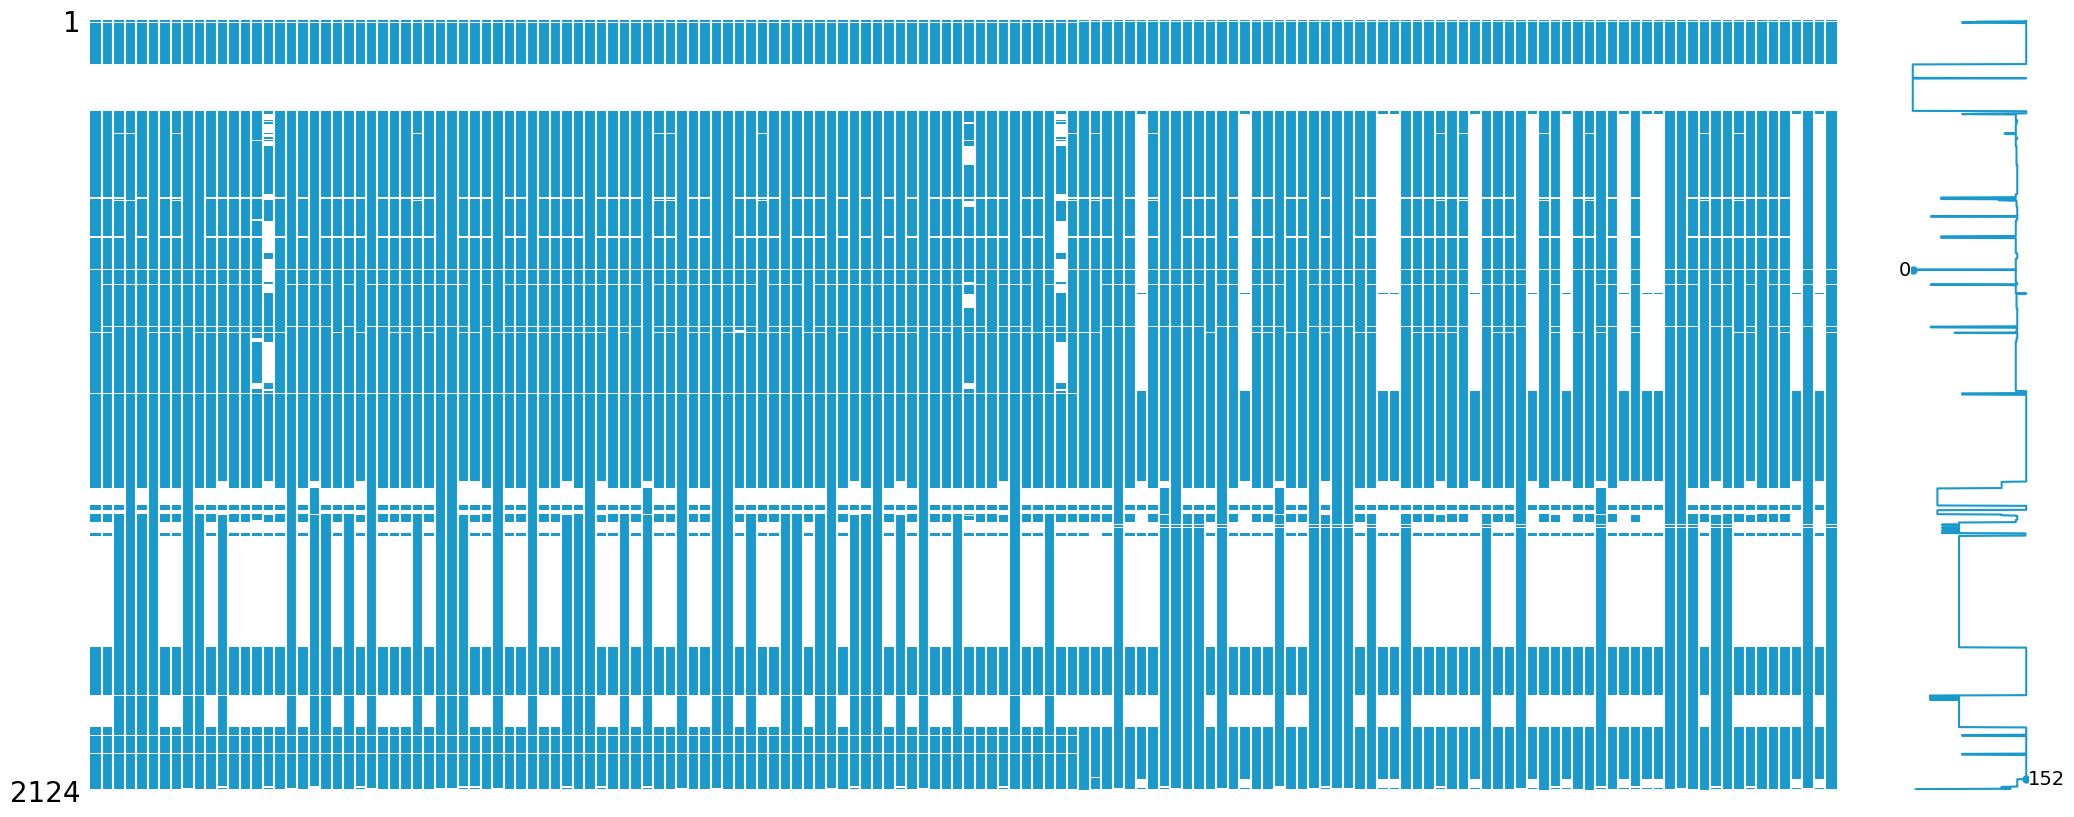

In [177]:
msno.matrix(t503.T, color=(0.1, 0.6, 0.8))

1. 같은 값으로만 채워진 column 찾기 

In [178]:
# Get the counts of unique values per column
value_counts = t503.iloc[:,4:].apply(lambda x: x.nunique(dropna=False))

# Filter columns with only one unique value
unique_columns = value_counts[value_counts >= 2].index
duplicated_columns = value_counts[value_counts <= 1].index

t503[unique_columns]

,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_136,X_137,X_138,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,18031.0,18031.0,NaN,NaN,0.19,0.20,0.19,354.0,354.0,354.0,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
1,8164.0,8164.0,NaN,NaN,0.19,0.20,0.19,172.0,172.0,172.0,...,56.38,57.10,51.49,56.08,64.40,1.0,NaN,NaN,NaN,NaN
2,21863.0,21863.0,NaN,NaN,0.20,0.21,0.20,705.0,705.0,705.0,...,58.07,55.23,51.33,56.78,63.48,1.0,NaN,NaN,NaN,NaN
3,19078.0,19078.0,NaN,NaN,0.20,0.21,0.19,527.0,527.0,525.0,...,56.66,60.49,40.51,48.65,63.70,1.0,NaN,NaN,NaN,NaN
4,22322.0,22322.0,NaN,NaN,0.20,0.21,0.20,719.0,719.0,720.0,...,55.91,56.14,40.27,56.86,61.74,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,896.0,896.0,0.19,0.21,0.19,59.0,59.0,59.0,...,55.25,51.05,49.83,58.79,63.26,1.0,NaN,NaN,NaN,NaN
62,NaN,NaN,17860.0,17860.0,0.19,0.20,0.19,559.0,559.0,559.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
63,NaN,NaN,19854.0,19854.0,0.20,0.21,0.20,413.0,414.0,414.0,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,17771.0,17771.0,0.19,0.20,0.19,558.0,558.0,558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [179]:
# 모든 값이 152 or 0
t503[duplicated_columns].count().value_counts()

0      129
152     93
dtype: int64

In [180]:
# Nan으로만  채워져있기도 함 
t503['X_248'].value_counts(dropna=False)

NaN    152
Name: X_248, dtype: int64

In [181]:
t503 = t503.drop(duplicated_columns, axis=1)
t503

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,0,0.522159,T050304,A_31,18031.0,18031.0,NaN,NaN,0.19,0.20,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
1,2,0.541429,T050304,A_31,8164.0,8164.0,NaN,NaN,0.19,0.20,...,56.38,57.10,51.49,56.08,64.40,1.0,NaN,NaN,NaN,NaN
2,1,0.529130,T050304,A_31,21863.0,21863.0,NaN,NaN,0.20,0.21,...,58.07,55.23,51.33,56.78,63.48,1.0,NaN,NaN,NaN,NaN
3,1,0.528817,T050304,A_31,19078.0,19078.0,NaN,NaN,0.20,0.21,...,56.66,60.49,40.51,48.65,63.70,1.0,NaN,NaN,NaN,NaN
4,1,0.526868,T050304,A_31,22322.0,22322.0,NaN,NaN,0.20,0.21,...,55.91,56.14,40.27,56.86,61.74,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0.521494,T050307,A_31,NaN,NaN,896.0,896.0,0.19,0.21,...,55.25,51.05,49.83,58.79,63.26,1.0,NaN,NaN,NaN,NaN
62,2,0.540724,T050307,A_31,NaN,NaN,17860.0,17860.0,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
63,2,0.541819,T050307,A_31,NaN,NaN,19854.0,19854.0,0.20,0.21,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
64,2,0.552100,T050307,A_31,NaN,NaN,17771.0,17771.0,0.19,0.20,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


2. 모든 행이 같은 값을 가지는 두 개 이상의 column 찾기 (중복 column 찾기)

In [182]:
# X212, 213, 214, 215를 보면 값의 차이가 미미하지만 완전히 똑같은 213, 214가 있기 때문에.. 
df = t503.iloc[:, 64:84]
df.describe()

,X_209,X_210,X_211,X_212,X_213,X_214,X_215,X_216,X_217,X_218,X_219,X_220,X_221,X_222,X_223,X_224,X_225,X_226,X_227,X_228
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,57.705263,57.705263,53.884211,51.336842,53.297368,53.297368,53.623026,54.667105,51.998026,53.826316,53.826316,59.264474,55.693421,51.638158,51.638158,50.948684,51.998026,52.662500,59.700658,53.480263
std,2.879726,2.879726,4.343559,1.515513,1.232235,1.232235,2.274432,1.707939,1.319164,1.576892,1.576892,1.599686,0.743775,1.122434,1.122434,1.087922,1.319164,1.017907,1.120105,1.081515
min,55.200000,55.200000,50.200000,48.100000,52.200000,52.200000,51.200000,53.200000,50.900000,52.300000,52.300000,54.800000,53.700000,50.500000,50.500000,50.100000,50.900000,51.800000,56.000000,52.600000
25%,55.200000,55.200000,50.200000,50.200000,52.600000,52.600000,52.000000,53.200000,50.900000,52.300000,52.300000,58.700000,55.400000,50.500000,50.500000,50.100000,50.900000,51.800000,59.400000,52.600000
50%,55.200000,55.200000,50.200000,50.200000,52.600000,52.600000,52.000000,53.200000,51.300000,53.200000,53.200000,58.700000,55.400000,51.300000,51.300000,50.100000,51.300000,51.800000,59.400000,52.600000
75%,61.000000,61.000000,59.100000,53.000000,53.800000,53.800000,56.375000,56.700000,52.200000,54.400000,54.400000,61.100000,56.400000,52.000000,52.000000,51.900000,52.200000,53.700000,60.700000,54.400000
max,62.000000,62.000000,59.800000,53.600000,58.000000,58.000000,57.000000,58.000000,55.200000,59.600000,59.600000,61.600000,57.400000,54.100000,54.100000,54.000000,55.200000,54.700000,61.400000,56.000000


In [183]:
alist = t503['X_213'] - t503['X_214']
alist = alist.tolist()
print(alist)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [184]:
df = t503.iloc[:,4:].T.drop_duplicates(keep='first').T
t503 = pd.concat([t503.iloc[:,:4], df], axis=1)
t503

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2839,X_2840,X_2841,X_2842,X_2843,X_2871,X_2872,X_2873,X_2874,X_2875
0,0,0.522159,T050304,A_31,18031.0,18031.0,NaN,NaN,0.19,0.20,...,5.02,7.02,40.56,0.000156,0.000008,1.0,NaN,NaN,NaN,NaN
1,2,0.541429,T050304,A_31,8164.0,8164.0,NaN,NaN,0.19,0.20,...,5.01,6.53,39.58,0.000120,0.000008,1.0,NaN,NaN,NaN,NaN
2,1,0.529130,T050304,A_31,21863.0,21863.0,NaN,NaN,0.20,0.21,...,4.99,7.04,41.03,0.000174,0.000010,1.0,NaN,NaN,NaN,NaN
3,1,0.528817,T050304,A_31,19078.0,19078.0,NaN,NaN,0.20,0.21,...,4.52,7.01,40.62,0.000398,0.000033,1.0,NaN,NaN,NaN,NaN
4,1,0.526868,T050304,A_31,22322.0,22322.0,NaN,NaN,0.20,0.21,...,5.00,7.00,36.53,0.000187,0.000011,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,0.521494,T050307,A_31,NaN,NaN,896.0,896.0,0.19,0.21,...,4.50,6.99,40.08,0.001350,0.000012,1.0,NaN,NaN,NaN,NaN
62,2,0.540724,T050307,A_31,NaN,NaN,17860.0,17860.0,0.19,0.20,...,5.01,6.54,39.11,0.001160,0.000018,1.0,NaN,NaN,NaN,NaN
63,2,0.541819,T050307,A_31,NaN,NaN,19854.0,19854.0,0.20,0.21,...,5.00,7.05,36.54,0.001150,0.000009,NaN,NaN,NaN,NaN,NaN
64,2,0.552100,T050307,A_31,NaN,NaN,17771.0,17771.0,0.19,0.20,...,5.04,7.01,38.03,0.001170,0.000006,1.0,NaN,NaN,NaN,NaN


In [185]:
# 예시의 213, 214 중복에서 214가 사라진 것을 확인 
df.iloc[:,60:80].head()

,X_213,X_215,X_216,X_217,X_218,X_220,X_221,X_222,X_224,X_226,X_227,X_228,X_230,X_231,X_233,X_236,X_237,X_238,X_240,X_242
0,52.6,52.0,53.2,50.9,52.3,58.7,55.4,50.5,50.1,51.8,59.4,52.6,54.9,53.2,0.0,290.0,290.0,290.0,41.2,35.7
1,52.6,52.0,53.2,50.9,52.3,58.7,55.4,50.5,50.1,51.8,59.4,52.6,54.9,53.2,0.0,290.0,290.0,290.0,39.9,34.4
2,52.6,52.0,53.2,52.0,53.2,58.7,55.4,51.3,50.1,51.8,59.4,52.6,54.9,53.2,0.0,290.0,290.0,290.0,41.9,36.3
3,52.6,52.0,53.2,50.9,52.3,58.7,55.4,50.5,50.1,51.8,59.4,52.6,54.9,53.2,0.0,288.0,290.0,46.0,41.2,35.8
4,52.6,52.0,53.2,52.0,53.2,58.7,55.4,51.3,50.1,51.8,59.4,52.6,54.9,53.2,0.0,290.0,290.0,290.0,37.0,36.0


<Axes: >

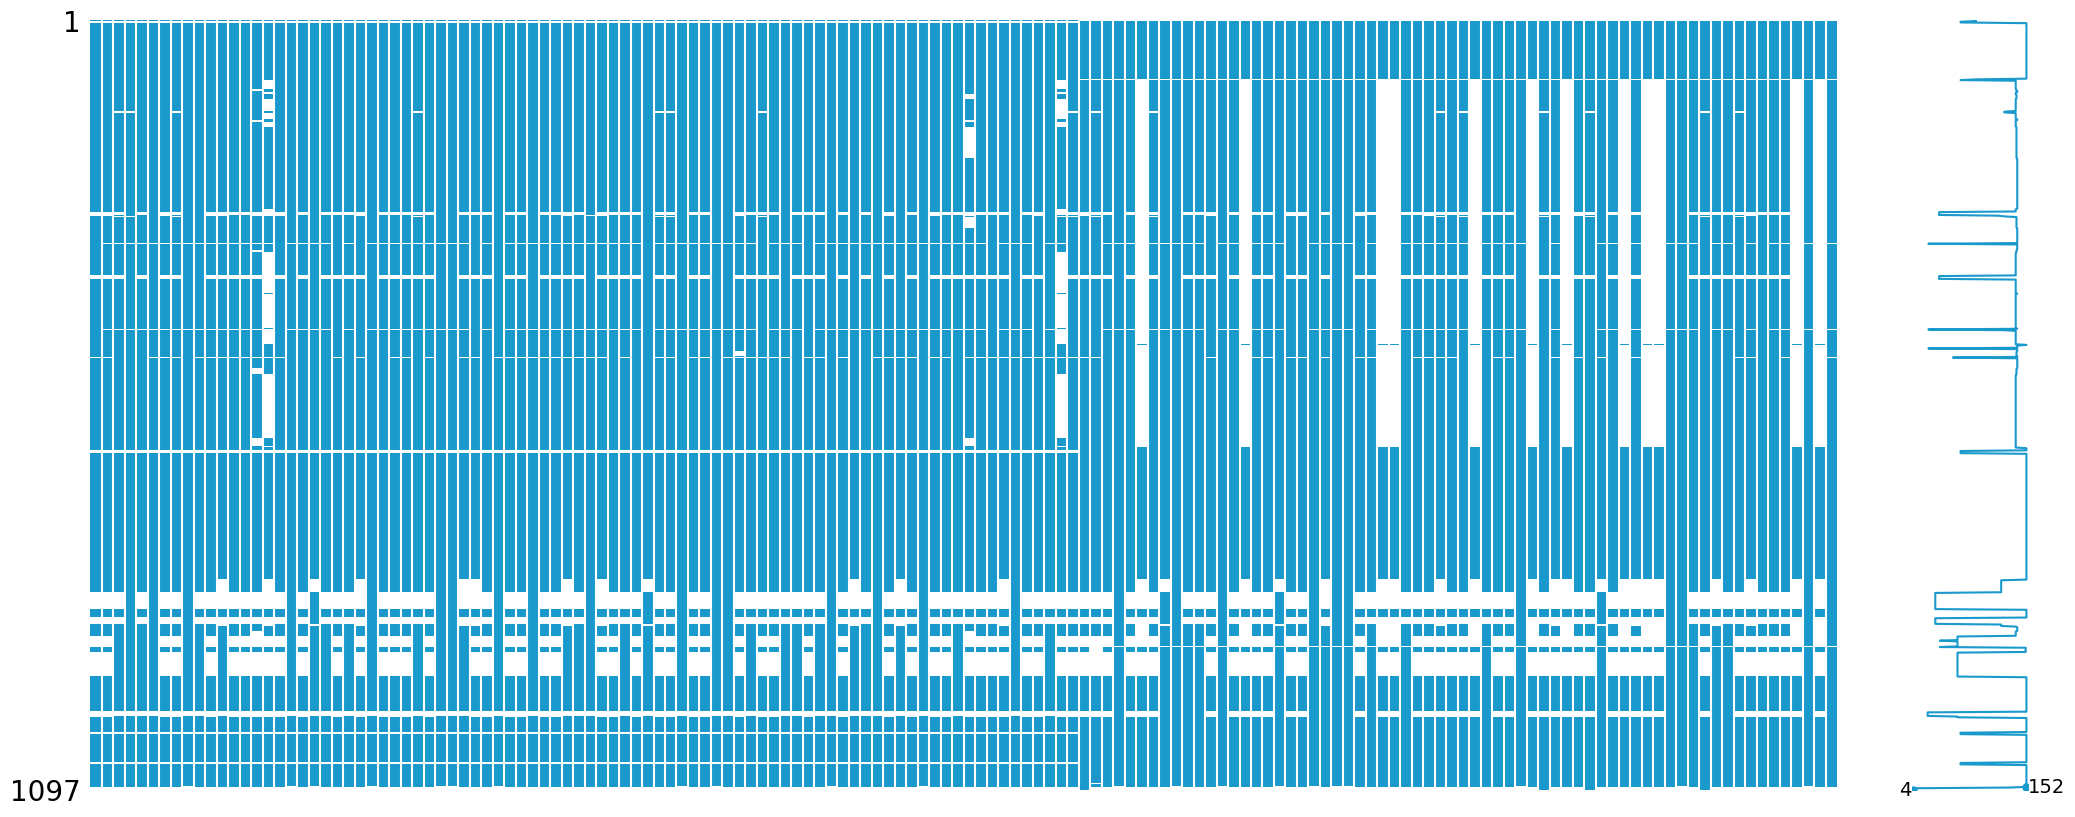

In [186]:
msno.matrix(t503.T.iloc[4:,:], color=(0.1, 0.6, 0.8))

뭘 더 해야 할까요? 
- 정규화
- 결측치 처리
- 차원 축소

### T103: T010306 & T010305

152 X 2,124

1. 같은 값으로만 채워진 column 찾기 
    - 152 X 756
2. 모든 행이 같은 값을 가지는 두 개 이상의 column 찾기 (중복 column 찾기)
    - 152 x 599

In [214]:
t103 = pd.concat([t10306, t10305])
t103

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,X_132,X_133,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,0,0.517938,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.534195,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.533079,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.525221,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0.538030,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0.533587,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1,0.533179,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,1,0.530048,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0,0.511984,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

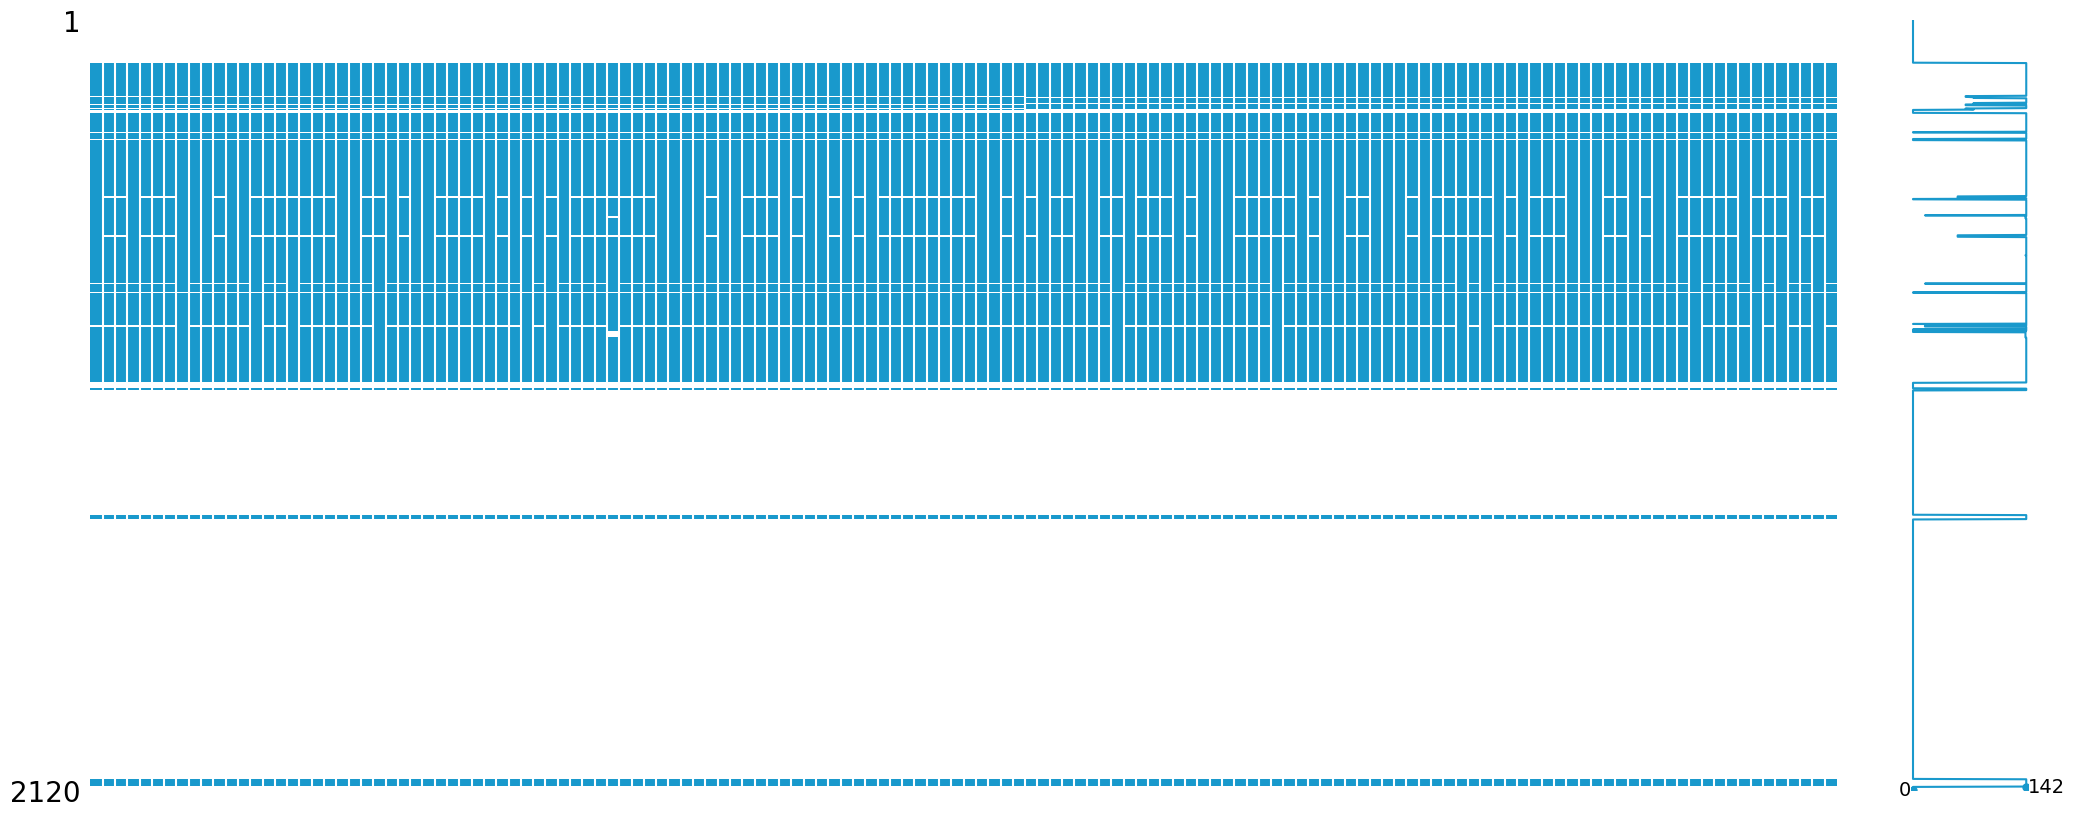

In [215]:
msno.matrix(t103.T.iloc[4:,:], color=(0.1, 0.6, 0.8))

1. 같은 값으로만 채워진 column 찾기 

In [216]:
# Get the counts of unique values per column
value_counts = t103.iloc[:,4:].apply(lambda x: x.nunique(dropna=False))

# Filter columns with only one unique value
unique_columns = value_counts[value_counts >= 2].index
duplicated_columns = value_counts[value_counts <= 1].index

t103[unique_columns].head()

,X_246,X_247,X_248,X_250,X_251,X_253,X_254,X_256,X_257,X_258,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,1.0,91.0,1.0,12.0,0.0,12.0,51.0,443.7,450.0,434.3,...,175.8,192.7,178.296429,167.4,185.0,179.503571,172.6,466.0,447.769231,422.0
1,1.0,93.0,4.0,11.0,0.0,12.0,51.0,453.8,457.3,444.8,...,194.4,199.1,186.344828,161.4,165.1,156.706897,151.1,466.0,448.150943,423.0
2,2.0,95.0,124.0,11.0,0.0,12.0,51.0,490.8,497.8,481.5,...,196.1,211.1,197.392857,173.1,187.6,182.142857,175.1,466.0,445.307692,425.0
3,1.0,96.0,27.0,12.0,0.0,12.0,51.0,471.1,476.1,464.6,...,169.8,192.0,185.028571,181.0,189.2,183.953571,179.5,466.0,441.653846,423.0
4,1.0,92.0,152.0,11.0,0.0,12.0,51.0,501.8,510.4,488.5,...,196.6,199.7,185.437931,165.9,178.0,169.148276,151.8,466.0,448.622641,427.0


In [217]:
t103 = t103.drop(duplicated_columns, axis=1)
t103.head()

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_250,X_251,X_253,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,0,0.517938,T010306,A_31,1.0,91.0,1.0,12.0,0.0,12.0,...,175.8,192.7,178.296429,167.4,185.0,179.503571,172.6,466.0,447.769231,422.0
1,1,0.534195,T010306,A_31,1.0,93.0,4.0,11.0,0.0,12.0,...,194.4,199.1,186.344828,161.4,165.1,156.706897,151.1,466.0,448.150943,423.0
2,1,0.533079,T010306,A_31,2.0,95.0,124.0,11.0,0.0,12.0,...,196.1,211.1,197.392857,173.1,187.6,182.142857,175.1,466.0,445.307692,425.0
3,1,0.525221,T010306,A_31,1.0,96.0,27.0,12.0,0.0,12.0,...,169.8,192.0,185.028571,181.0,189.2,183.953571,179.5,466.0,441.653846,423.0
4,2,0.538030,T010306,A_31,1.0,92.0,152.0,11.0,0.0,12.0,...,196.6,199.7,185.437931,165.9,178.0,169.148276,151.8,466.0,448.622641,427.0


2. 모든 행이 같은 값을 가지는 두 개 이상의 column 찾기 (중복 column 찾기)

In [219]:
df = t103.iloc[:,4:].T.drop_duplicates(keep='first').T
t103 = pd.concat([t103.iloc[:,:4], df], axis=1)
t103.head()

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_250,X_251,X_253,...,X_1696,X_1697,X_2044,X_2045,X_2046,X_2047,X_2048,X_2049,X_2050,X_2051
0,0,0.517938,T010306,A_31,1.0,91.0,1.0,12.0,0.0,12.0,...,35.3,33.4,10431.0,9131.0,9130.0,10430.0,2513.0,2513.0,293.0,2513.0
1,1,0.534195,T010306,A_31,1.0,93.0,4.0,11.0,0.0,12.0,...,35.3,33.8,11092.0,9793.0,9792.0,11091.0,126.0,126.0,126.0,572.0
2,1,0.533079,T010306,A_31,2.0,95.0,124.0,11.0,0.0,12.0,...,37.2,35.2,11510.0,10211.0,10210.0,11509.0,317.0,317.0,317.0,764.0
3,1,0.525221,T010306,A_31,1.0,96.0,27.0,12.0,0.0,12.0,...,36.3,33.9,10517.0,9217.0,9216.0,10515.0,2556.0,2556.0,2556.0,336.0
4,2,0.538030,T010306,A_31,1.0,92.0,152.0,11.0,0.0,12.0,...,37.7,36.2,10954.0,9654.0,9653.0,10952.0,71.0,71.0,71.0,517.0


<Axes: >

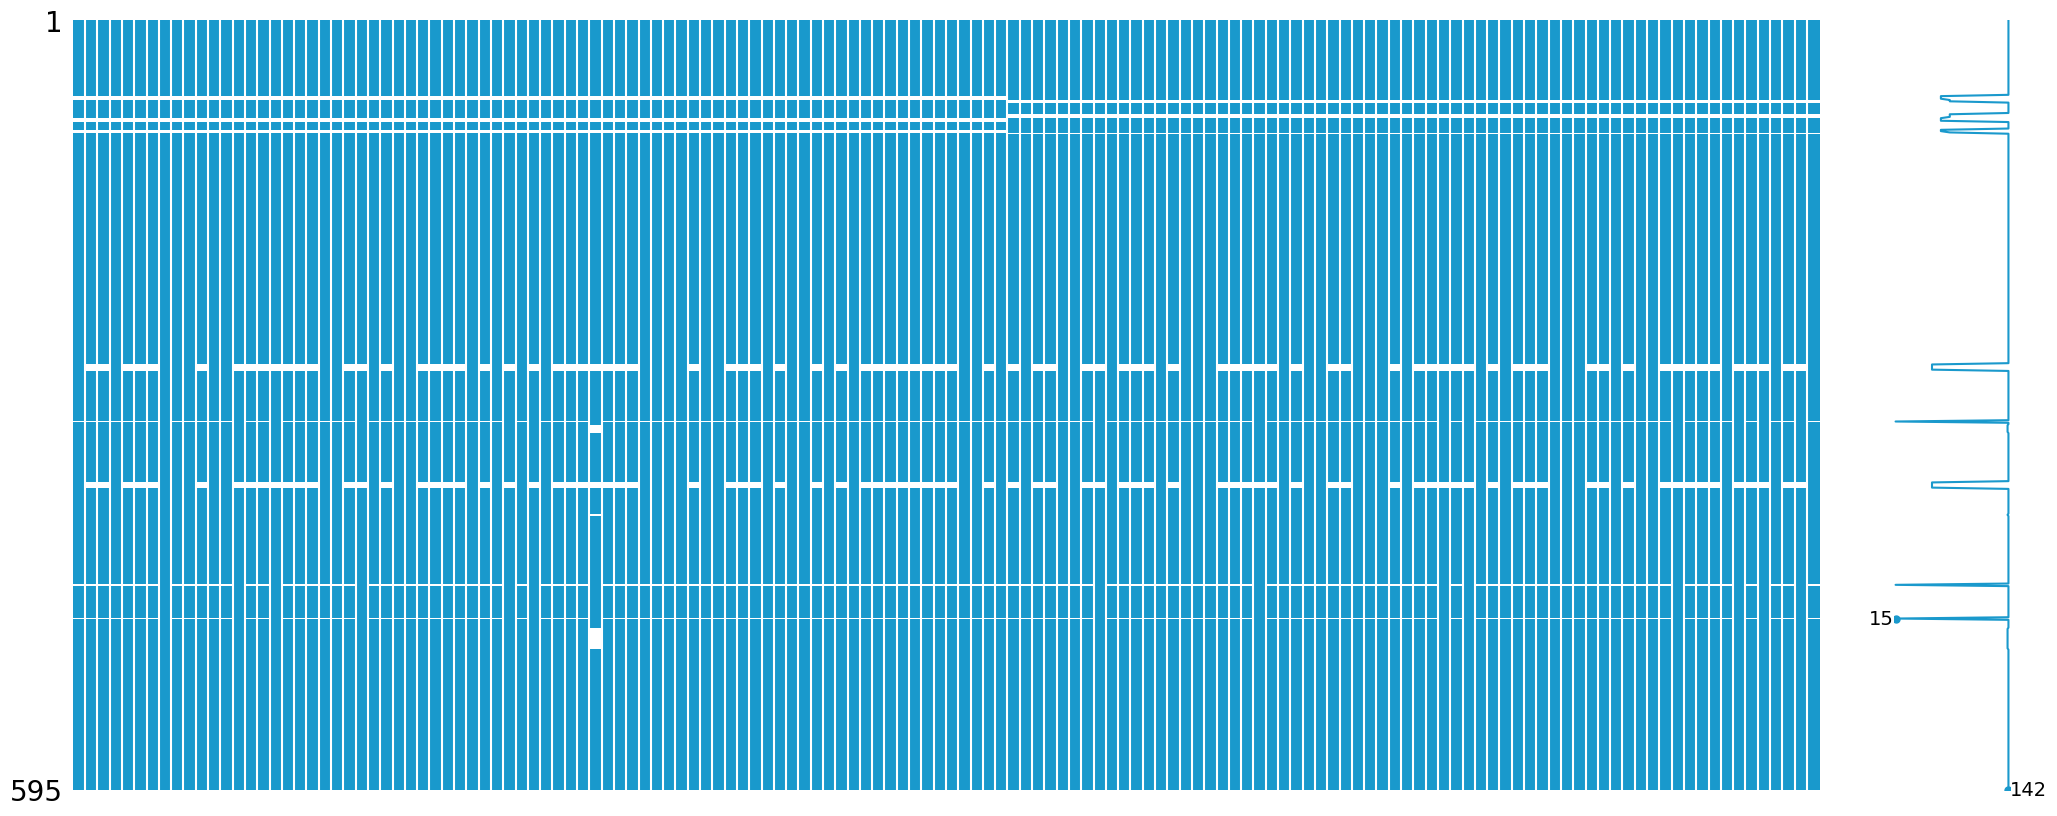

In [220]:
msno.matrix(t103.T.iloc[4:,:], color=(0.1, 0.6, 0.8))

# Appendix

In [ ]:
# scatter plot
fig, ax1  = plt.subplots(figsize=(20, 5))

ax2 = ax1.twinx()
lns1 = ax1.plot(t50304.index, t50304.Y_Quality, label='t50304', color='red')
lns2 = ax2.plot(t50307.index, t50307.Y_Quality, label='t50307', color='blue')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns,  labs, loc=0)

ax1.grid()
ax1.set_ylabel("Y Qaulity")
plt.show()

In [ ]:
# missing no with distributed columns
cols = [0, 530, 1060, 1590, 2120]
for i in range(0, len(cols)-1):
    p, q = cols[i], cols[i+1]    
    msno.matrix(dataX.iloc[:,p:q], color=(0.1, 0.6, 0.8))

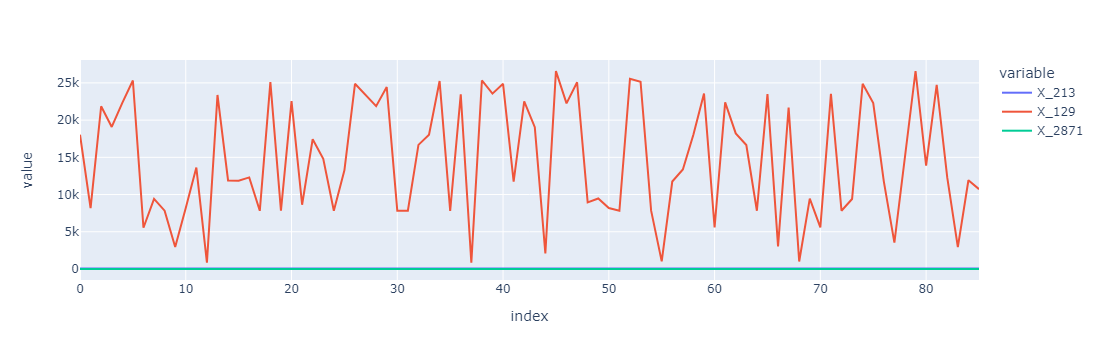

In [166]:
# plottly plotting 
df = t503.iloc[:, 4:]
fig = px.line(df, x=df.index, y=['X_213','X_129', 'X_2871'])
fig.update_traces(connectgaps=False)
fig.show()
#fig.add_trace(go.Scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16]))